In [ ]:

library(data.table)
library(ggplot2)
library(reshape2)

In [ ]:
##ORIGINAL VISUALIZATION
#dir='/ye/yelabstore3/10x.lupus/eqtls/sle.10pcs.subtracted/all/'
dir='/wynton/group/ye/ggordon/lupus/analyses/atac_enrichemnt/'
out='atac.enrichment.pdf'

#cts=c('Th', 'Tc', 'B', 'cM', 'ncM', 'NK', 'MK', 'cDC', 'PBMC')
#cts=c('pbmc', 'b', 'cdc', 'cm', 'ncm', 'nk', 'pdc', 'progen', 'prolif', 'tcyto', 'tem', 'tnaive', 'treg')
cts=c('pbmc', 'b', 'cdc', 'cm', 'ncm', 'nk', 'pdc', 'tcyto', 'tem', 'tnaive')
#cts=c('pbmc', 'b', 'cm', 'ncm', 'nk', 'pdc', 'tcyto', 'tem', 'tnaive')
#cts=c('pbmc_cg', 'b_cg', 'cdc_cg', 'cm_cg', 'ncm_cg', 'nk_cg', 'pb_cg', 'pdc_cg', 'progen_cg', 'prolif_cg', 't4_cg', 't8_cg')
#cts=c('pbmc_cg','b_cg', 'cdc_cg', 'cm_cg', 'ncm_cg', 'nk_cg',  't4_cg', 't8_cg')

cts=c('pbmc_cg', 'b_cg', 'cdc_cg', 'cm_cg', 'nk_cg', 'pb_cg', 'pdc_cg', 'progen_cg', 'prolif_cg', 't4_cg', 't8_cg')
cts=c('pbmc_cg', 'cdc_cg', 'cm_cg', 'nk_cg', 'pb_cg', 'pdc_cg', 'progen_cg', 'prolif_cg', 't4_cg', 't8_cg')

cts=c('pbmc_cg', 'b_cg', 'cdc_cg', 'cm_cg', 'ncm_cg', 'nk_cg','t4_cg', 't8_cg')
#cts=c('pbmc_cg',  'cdc_cg', 'cm_cg', 'ncm_cg', 'nk_cg','t4_cg', 't8_cg')


#cts=c('pbmc_cg', 'b_cg', 'cdc_cg', 'cm_cg', 'ncm_cg', 'nk_cg', 'pb_cg', 'pdc_cg', 'progen_cg', 't4_cg', 't8_cg')
#t8_cg.atac.MW.enrichment.genewise.1e5.txt 

all.df=NULL
for(c in cts){
    #res=fread(file=paste(dir, c, '.atac.MW.enrichment.txt', sep=''))
    #res=fread(file=paste(dir, 'filtered.', c, '.atac.MW.enrichment.txt', sep=''))
    #res=fread(file=paste(dir, c, '.atac.MW.enrichment.txt', sep=''))
    #res=fread(file=paste(dir, c, '.atac.MW.enrichment.genewise.1e6.txt', sep=''))
    #res=fread(file=paste(dir, c, '.atac.MW.enrichment.1e5_open.txt', sep=''))
    #res=fread(file=paste(dir, c, '.atac.MW.enrichment.1e6_expr_simple.txt', sep=''))
    res=fread(file=paste(dir, c, '.atac.MW.enrichment.1e_meta.txt', sep=''))
    all.df=rbind(all.df, data.frame(res, ct=c))
    
}



#all.df$pval_sig='.'
#all.df$pval_sig[all.df$pval < 0.00001]='*'
#all.df$pval_sig[all.df$pval < 0.0000001]='**'
#all.df$pval_sig[all.df$pval < 0.0000000001]='***'

all.df$pval_sig='.'
#all.df$pval_sig[all.df$pval < 0.1]='*'
all.df$pval_sig[all.df$pval < 0.01]='*'
all.df$pval_sig[all.df$pval < 0.001]='**'
all.df$pval_sig[all.df$pval < 0.0001]='***'


all.df.use=all.df[all.df$ct!='MK', ]
all.df.use$pair=paste(all.df.use$group, all.df.use$ct)
print(head(all.df.use))

all.df.use$logp=-log10(all.df.use$pval)

#mat=dcast(all.df.use, group ~ ct, value.var = 'OR')

#mat=dcast(all.df.use, group ~ ct, value.var = 'logp')
mat=dcast(all.df.use, group ~ ct, value.var = 'W')
rownames(mat)=mat$group

# #normalize by row
mat=mat[, -1]
col_names=colnames(mat)
row_names=rownames(mat)
print(mat)
mat_new=(mat)

mat_new=mat[-which(rownames(mat) %in% c('EPI_resting', 'progenitor_resting')), ]
col_names=colnames(mat_new)
row_names=rownames(mat_new)
#mat_new=mat[-which(rownames(mat) %in% c('EPI_resting', 'progenitor_resting',"open")), ]
#mat_new=mat[-which(rownames(mat) %in% c("open")), ]
print("new")
print(mat_new)
#mat_new <- t(apply(mat_new, 1, function(x){(x)}))
mat_new <- t(apply(mat_new, 1, function(x){scale(x)}))
#mat_new <- (apply(mat_new, 2, function(x){scale(x)}))


print('pre col')
print(mat_new)
colnames(mat_new)=col_names
rownames(mat_new)=row_names
print('new names')
print(mat_new)
df.use=melt(mat_new)
print(df.use)
df.use$pair=paste(df.use$Var1, df.use$Var2)
df.use$pval_sig=all.df.use$pval_sig[match(df.use$pair, all.df.use$pair)]


print(head(df.use))

# print(unique(df.use$Var1))
# print(unique(df.use$Var2))

# #  [1] B_resting          B_stimulated       B&T_stimulated     EPI_resting       
# #  [5] myeloid_resting    nk_resting         open               progenitor_resting
# #  [9] T_resting          T_stimulated       thymo_resting    


order_var1=c('B_resting', 'B_stimulated', 'B&T_stimulated', 'T_resting', 'T_stimulated',  'nk_resting', 'EPI_resting', 'progenitor_resting', 'thymo_resting', 'myeloid_resting', 'open')
#order_var1=c('B_resting', 'B_stimulated', 'B&T_stimulated', 'T_resting', 'T_stimulated',  'nk_resting','thymo_resting', 'myeloid_resting', 'open')
#order_var1=c('B_resting', 'B_stimulated', 'B&T_stimulated', 'T_resting', 'T_stimulated',  'nk_resting', 'thymo_resting', 'myeloid_resting', 'open')
order_var1=c('B', 'T',  'nk_resting', 'EPI_resting', 'progenitor_resting', 'myeloid_resting','thymo_resting',  'open')


#order_var2=c('B', 'Th', 'Tc', 'NK', 'cM', 'ncM', 'cDC', 'PBMC', 'ct.combined')
#order_var2=c('b', 'tcyto', 'tem', 'tnaive', 'nk', 'cm', 'ncm', 'cdc', 'pdc','progen','prolif','pbmc', 'ct.combined')

#order_var2=c('b_cg', 'tcyto', 'tem', 'tnaive', 'nk', 'cm', 'ncm', 'cdc', 'pdc','progen','prolif','pbmc', 'ct.combined')
#order_var2=c( 'b_cg','pb_cg', 't4_cg', 't8_cg', 'nk_cg','cm_cg', 'ncm_cg','cdc_cg',  'pdc_cg', 'progen_cg','pbmc_cg', 'ct.combined')
order_var2=c( 'b_cg','pb_cg', 't4_cg', 't8_cg', 'nk_cg', 'prolif_cg','progen_cg','cm_cg', 'ncm_cg','pdc_cg','cdc_cg','pbmc_cg', 'ct.combined')
#order_var2=c( 'b_cg', 't4_cg', 't8_cg', 'nk_cg', 'cm_cg', 'ncm_cg','cdc_cg','pbmc_cg', 'ct.combined')


#order_var2=c( 'b_cg','pb_cg', 't4_cg', 't8_cg', 'nk_cg','cm_cg', 'cdc_cg',  'pdc_cg', 'progen_cg', 'prolif_cg','pbmc_cg', 'ct.combined')

#order_var2=c('b', 'tcyto', 'tem', 'tnaive', 'nk', 'cm', 'ncm', 'pdc','pbmc', 'ct.combined')
df.use$Var1=factor(df.use$Var1, levels=order_var1)
df.use$Var2=factor(df.use$Var2, levels=order_var2)

#df.use=df.use[-which(df.use$Var1 %in% c('EPI_resting', 'progenitor_resting')), ]

In [3]:
df.use

Var1,Var2,value,pair,pval_sig
<fct>,<fct>,<dbl>,<chr>,<chr>
B,pbmc_cg,0.6394051,B pbmc_cg,***
myeloid_resting,pbmc_cg,0.5578469,myeloid_resting pbmc_cg,***
nk_resting,pbmc_cg,0.8458658,nk_resting pbmc_cg,***
open,pbmc_cg,1.2653116,open pbmc_cg,***
T,pbmc_cg,1.0217474,T pbmc_cg,***
thymo_resting,pbmc_cg,1.2964248,thymo_resting pbmc_cg,***
B,b_cg,0.5447510,B b_cg,***
myeloid_resting,b_cg,-0.6644766,myeloid_resting b_cg,***
nk_resting,b_cg,-0.7734556,nk_resting b_cg,***


In [ ]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e6 all snps")
print(plt)

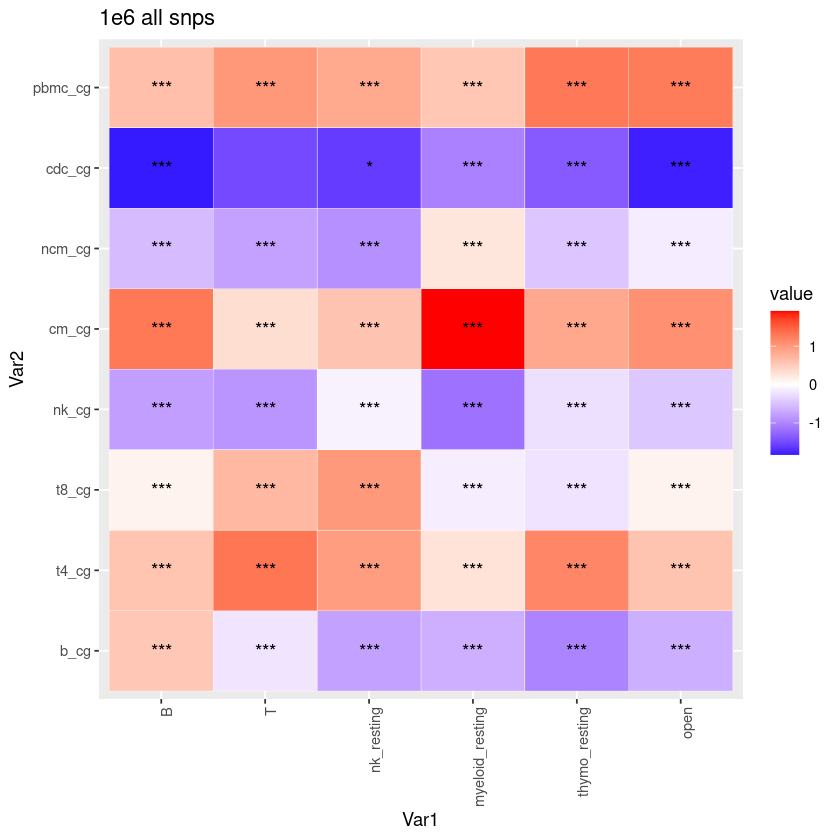

In [4]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e6 all snps")
print(plt)

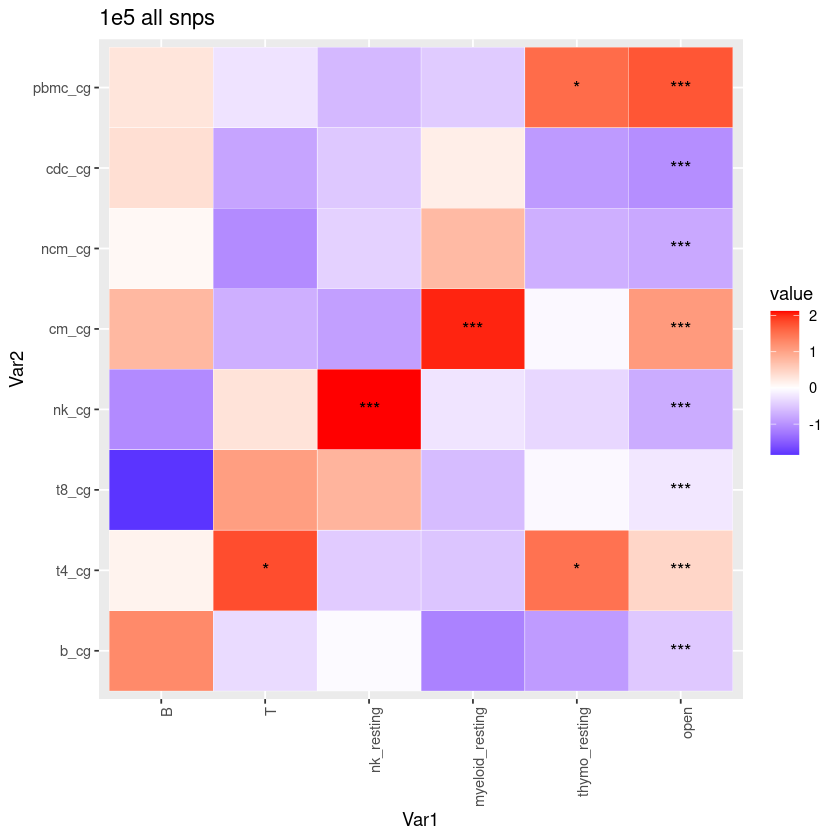

In [18]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 all snps")
print(plt)

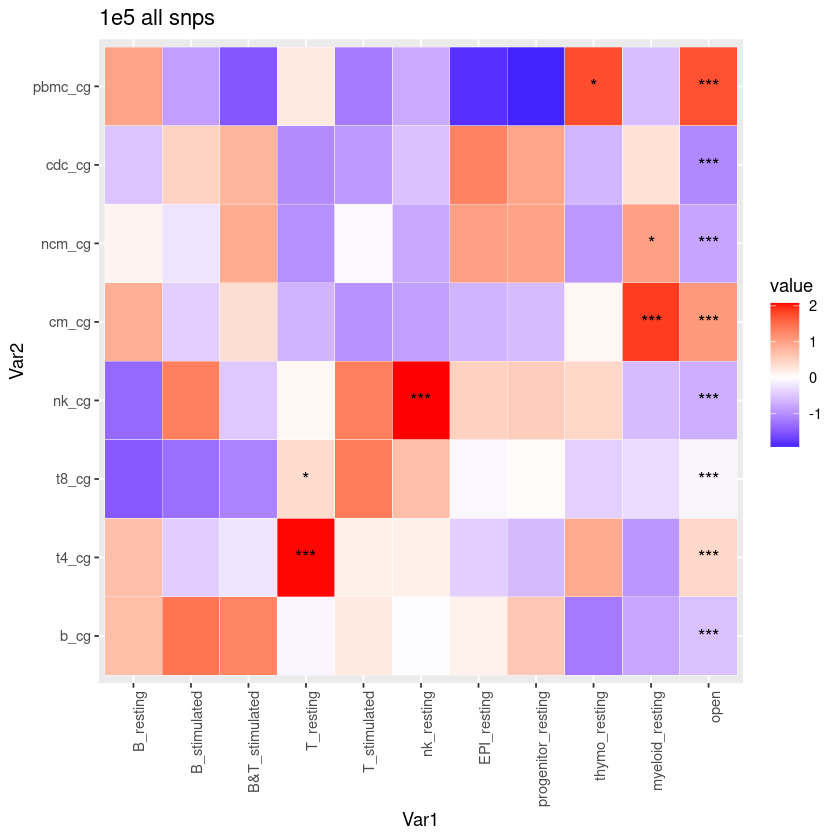

In [6]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 all snps")
print(plt)

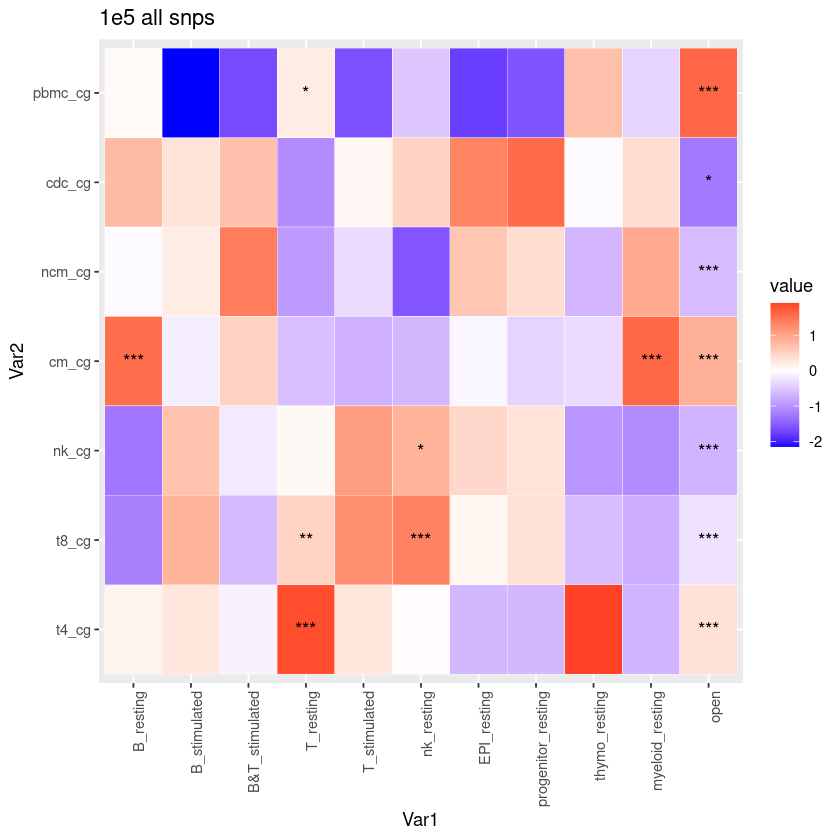

In [10]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 all snps")
print(plt)

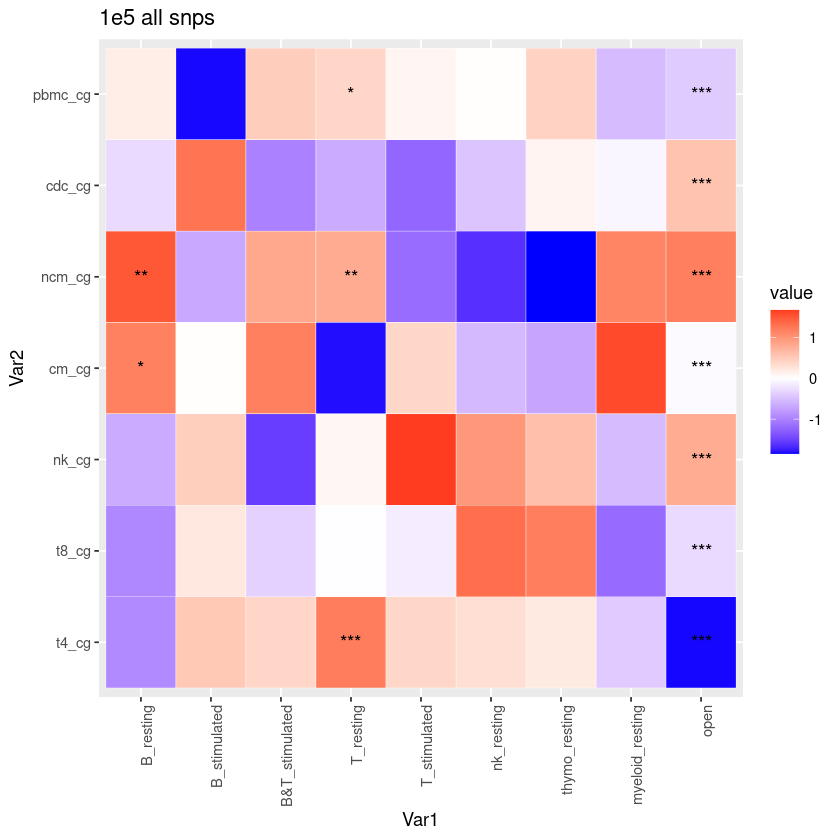

In [46]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 all snps")
print(plt)

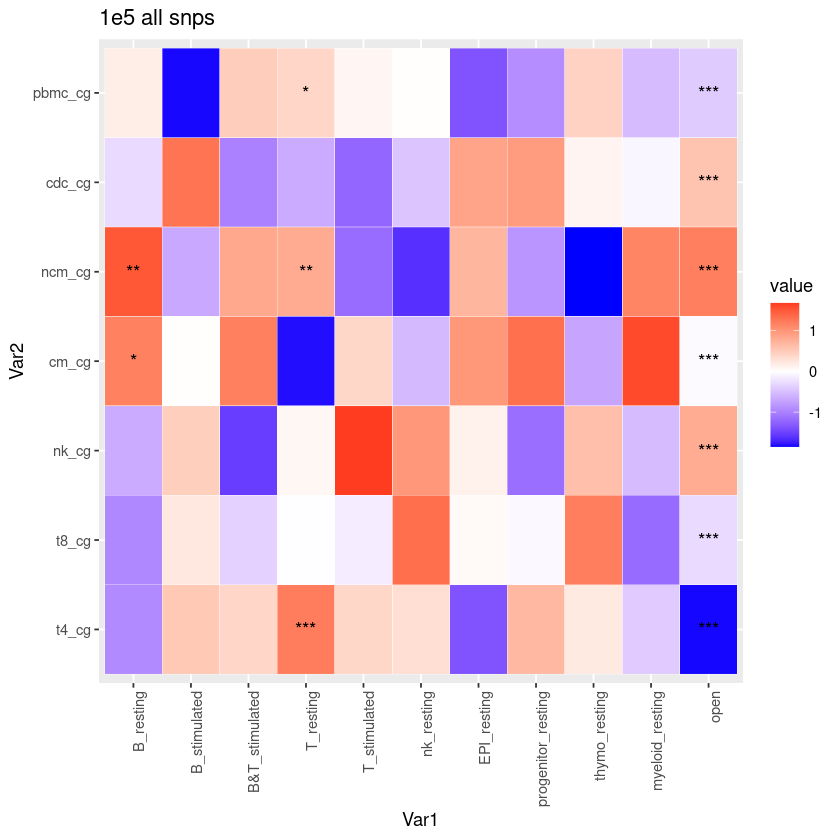

In [28]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 all snps")
print(plt)

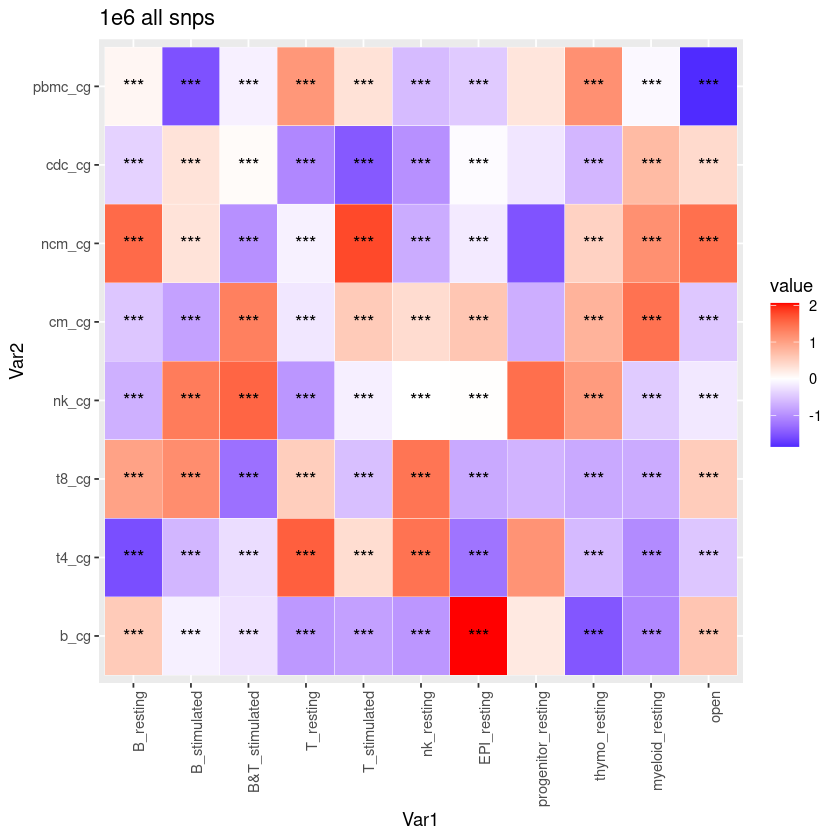

In [25]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e6 all snps")
print(plt)

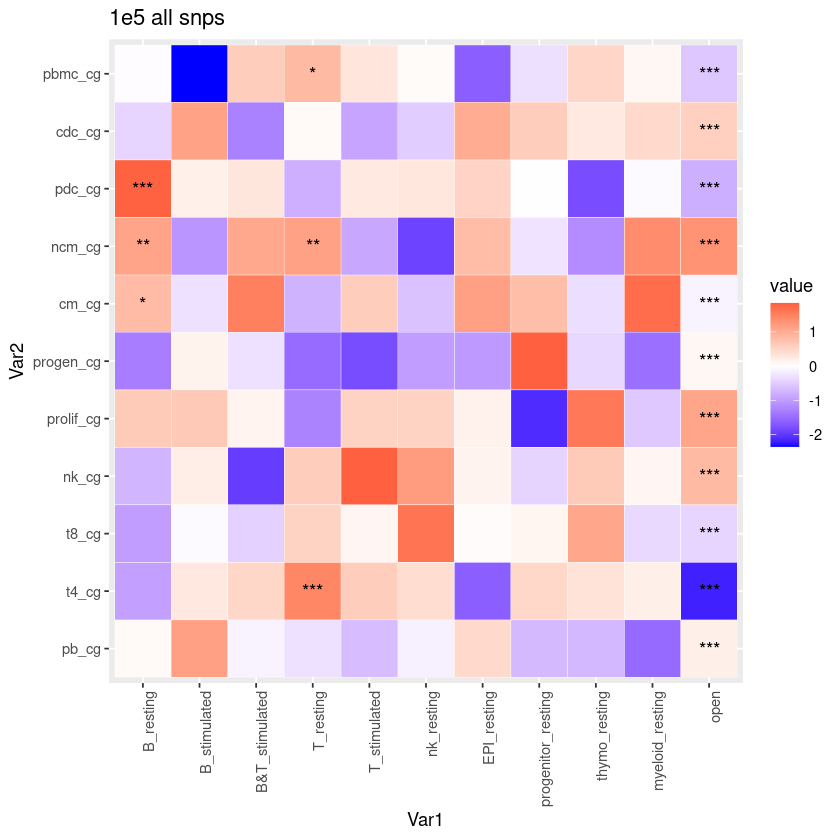

In [4]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 all snps")
print(plt)

In [76]:
options(repr.plot.width=8, repr.plot.height=5)


pdf('1e5.atac.MW.enrichment_open.heatmap.pdf', useDingbats = F, width =8 , height=5)
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 all snps")
print(plt)
dev.off()

png 
  2

In [3]:
mat_new=mat[-which(rownames(mat) %in% c('EPI_resting', 'progenitor_resting',"open")), ]

In [55]:
mat_new

,pbmc_cg,b_cg,cdc_cg,cm_cg,ncm_cg,nk_cg,pb_cg,pdc_cg,progen_cg,prolif_cg,t4_cg,t8_cg
B_resting,-0.33529830,-0.32093828,-0.33060432,-0.32668849,-0.32455232,-0.33536073,-0.32842461,-0.31749650,-0.32970213,-0.33221533,-0.33409321,-0.33996332
B_stimulated,-0.64180567,-0.63419910,-0.63434413,-0.64122327,-0.64077028,-0.63673894,-0.63756979,-0.63444548,-0.63489229,-0.63578521,-0.63932378,-0.64064787
B&T_stimulated,-0.50750386,-0.50019128,-0.50733704,-0.50707596,-0.50937288,-0.50431524,-0.50253052,-0.50718713,-0.50356369,-0.50082641,-0.50903899,-0.50296435
EPI_resting,-0.02011193,-0.02551994,-0.01340821,-0.02192937,-0.01440534,-0.01785757,-0.01390541,-0.01639649,-0.01678451,-0.01477102,-0.01573289,-0.01380248
myeloid_resting,-0.29726254,-0.30341059,-0.29692494,-0.29039636,-0.28833055,-0.30781530,-0.30525976,-0.30042663,-0.31323498,-0.30782633,-0.31124418,-0.31360042
nk_resting,-0.44374164,-0.44653893,-0.44279835,-0.45216935,-0.44514354,-0.43644378,-0.44698287,-0.44081717,-0.44034706,-0.43190229,-0.44040192,-0.43802503
open,2.79238486,2.79932757,2.79541206,2.78734938,2.79156215,2.79694949,2.78955580,2.79430236,2.79207044,2.79917341,2.79266913,2.78960129
progenitor_resting,0.73106215,0.71704410,0.72310237,0.74474459,0.73008715,0.72107006,0.74005830,0.72647801,0.73607092,0.71462331,0.73125593,0.73939116
T_resting,-0.41747217,-0.42058349,-0.42650407,-0.42521638,-0.42993349,-0.42097026,-0.42419552,-0.43250268,-0.42341376,-0.42548094,-0.41547137,-0.42097324
T_stimulated,-0.26240493,-0.27263407,-0.27220747,-0.26823382,-0.26914445,-0.26555220,-0.27477101,-0.27470536,-0.27429688,-0.27144679,-0.26425454,-0.26236527


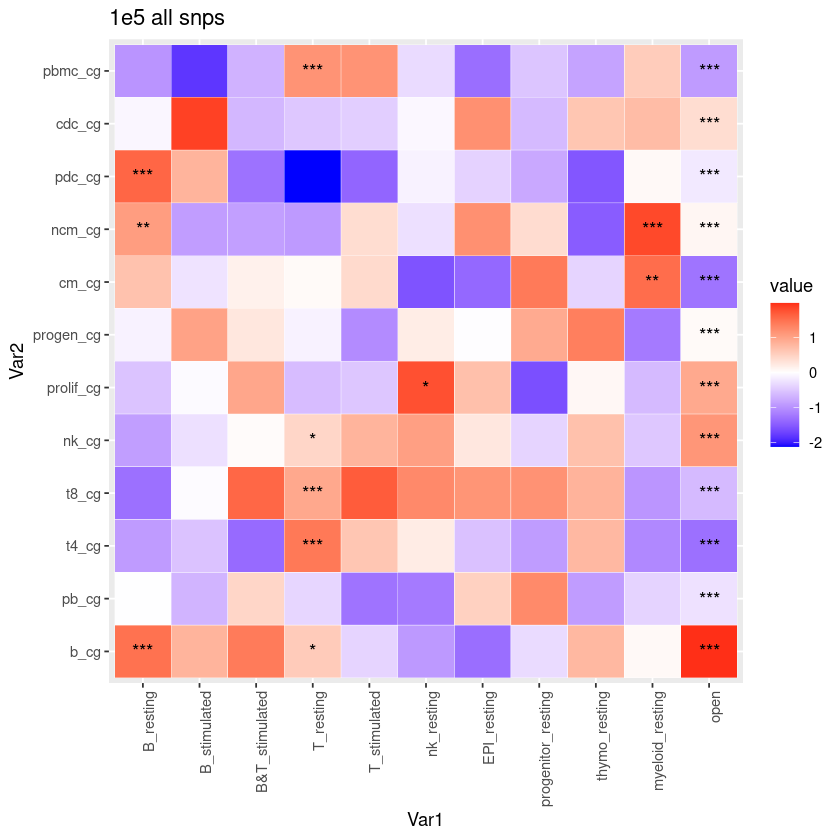

In [70]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 all snps")
print(plt)

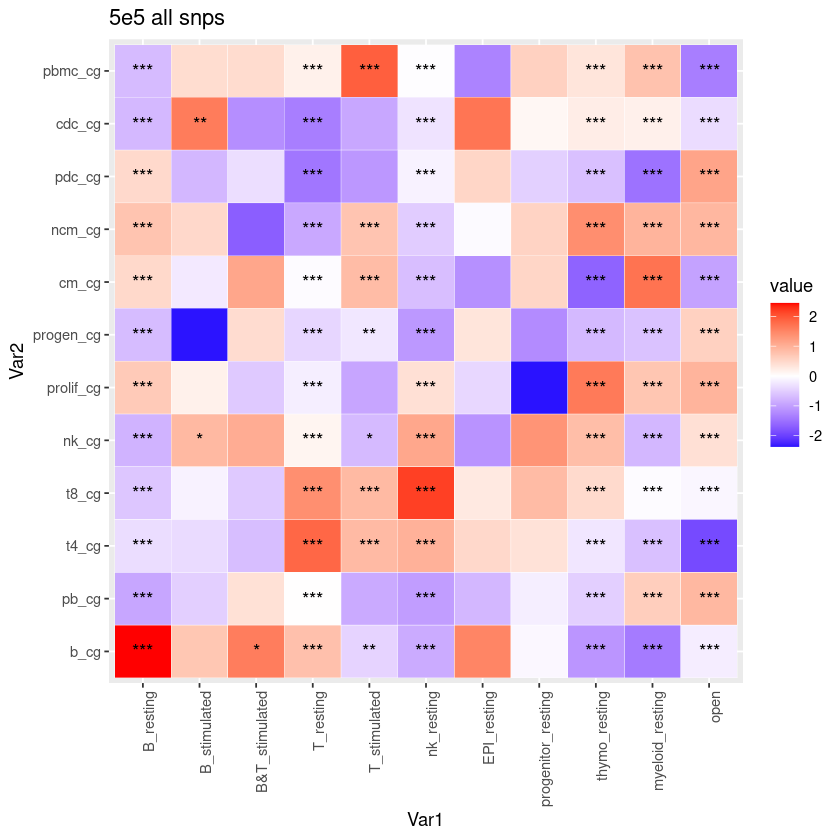

In [72]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("5e5 all snps")
print(plt)

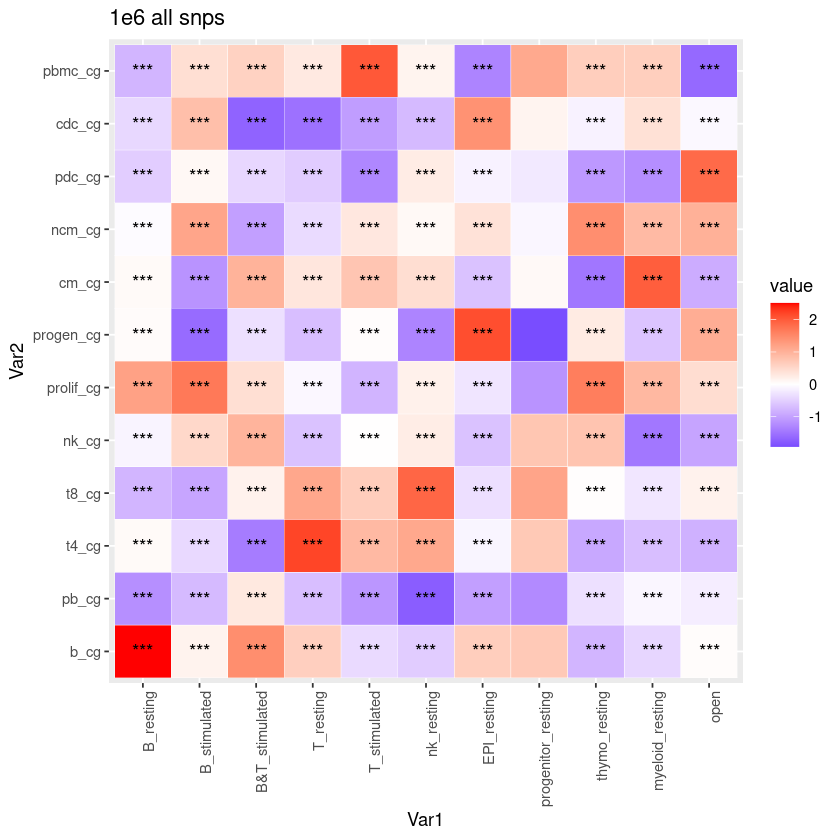

In [74]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e6 all snps")
print(plt)


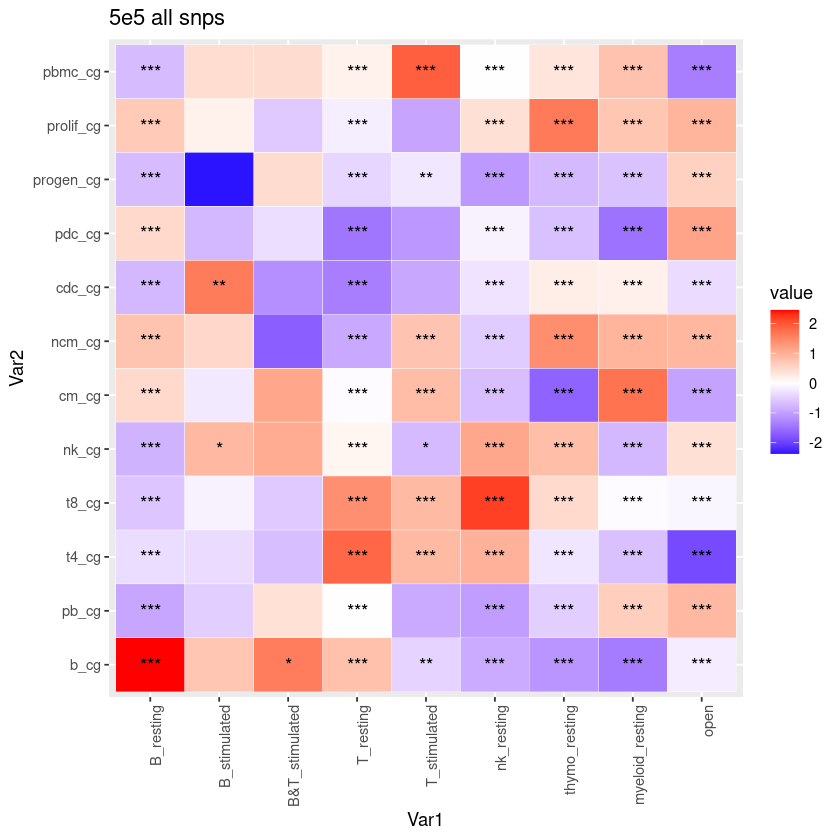

In [23]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("5e5 all snps")
print(plt)

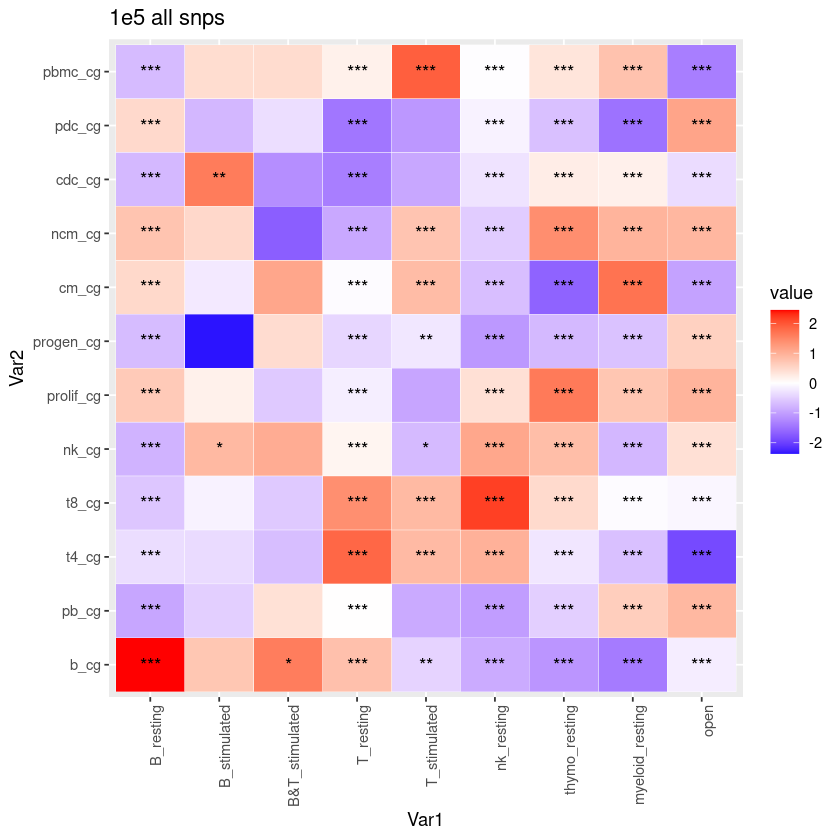

In [29]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 all snps")
print(plt)

In [11]:
m1 <- matrix(C<-(1:10),nrow=5, ncol=6)

In [12]:
m1

1,6,1,6,1,6
2,7,2,7,2,7
3,8,3,8,3,8
4,9,4,9,4,9
5,10,5,10,5,10


In [64]:
x=t(apply(m1, 1, sum))

In [65]:
x

21,27,33,39,45


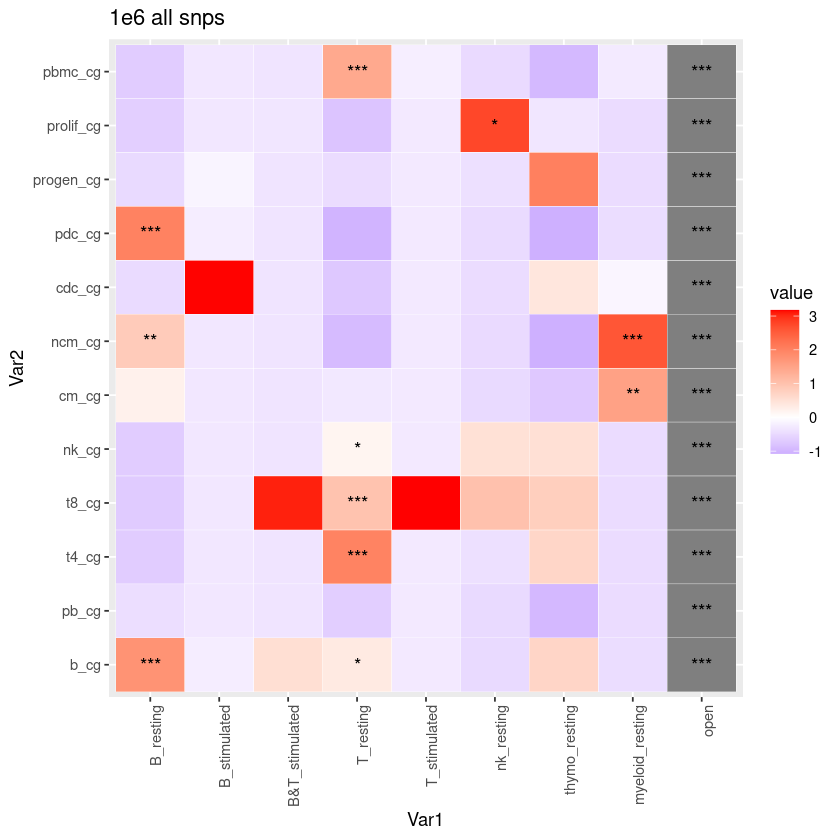

In [13]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e6 all snps")
print(plt)

In [ ]:
###v1 below, filtered res.bed to get pvalues, I think we were missing a lot of snps here

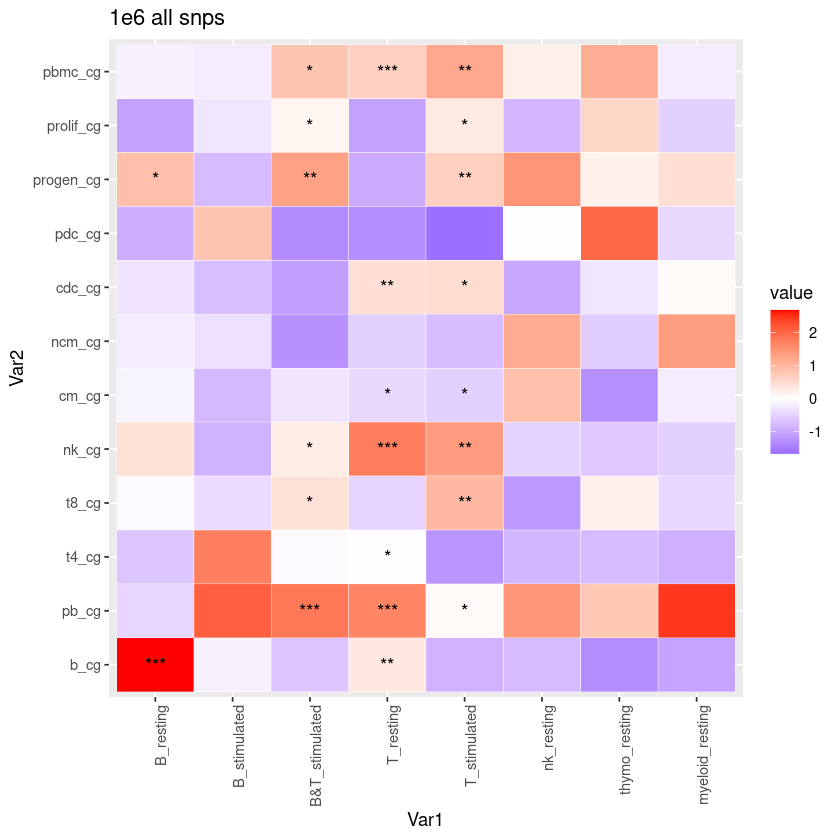

In [14]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e6 all snps")
print(plt)

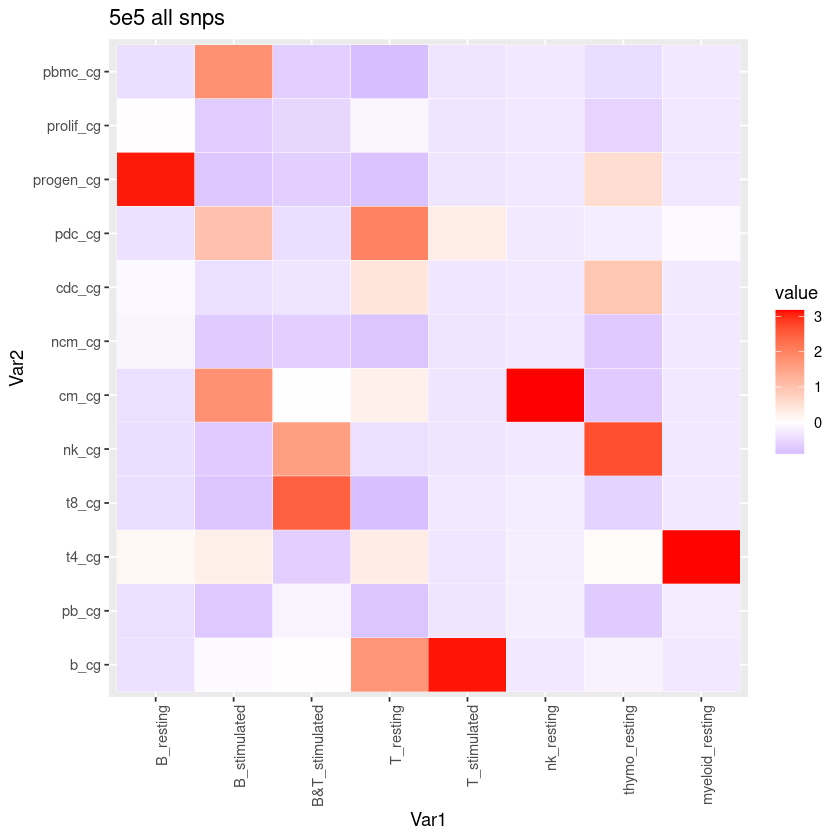

In [16]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("5e5 all snps")
print(plt)

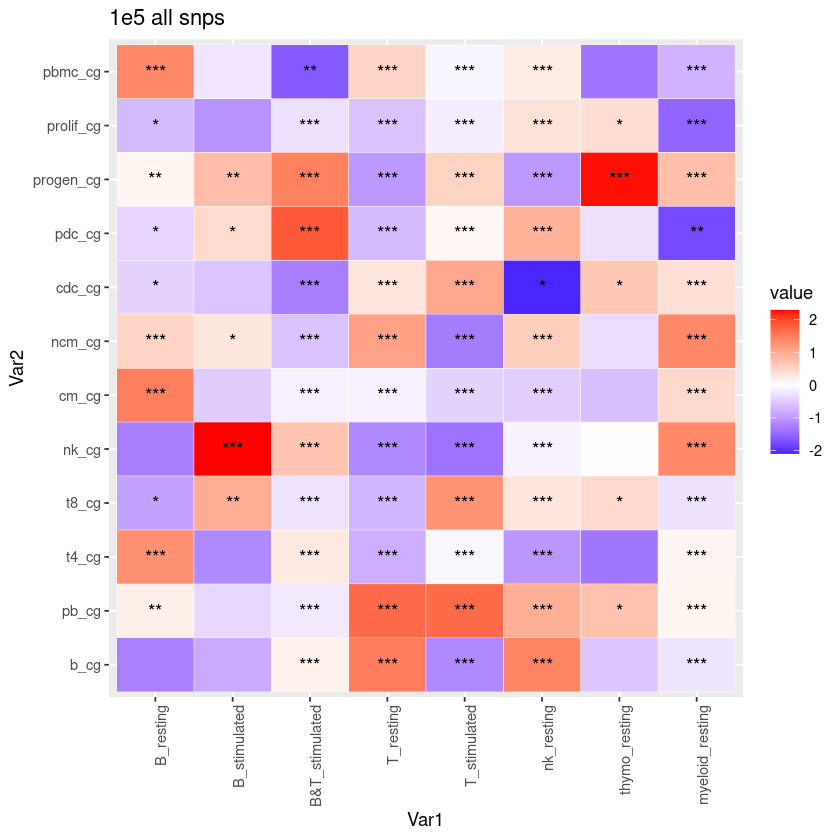

In [18]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 all snps")
print(plt)

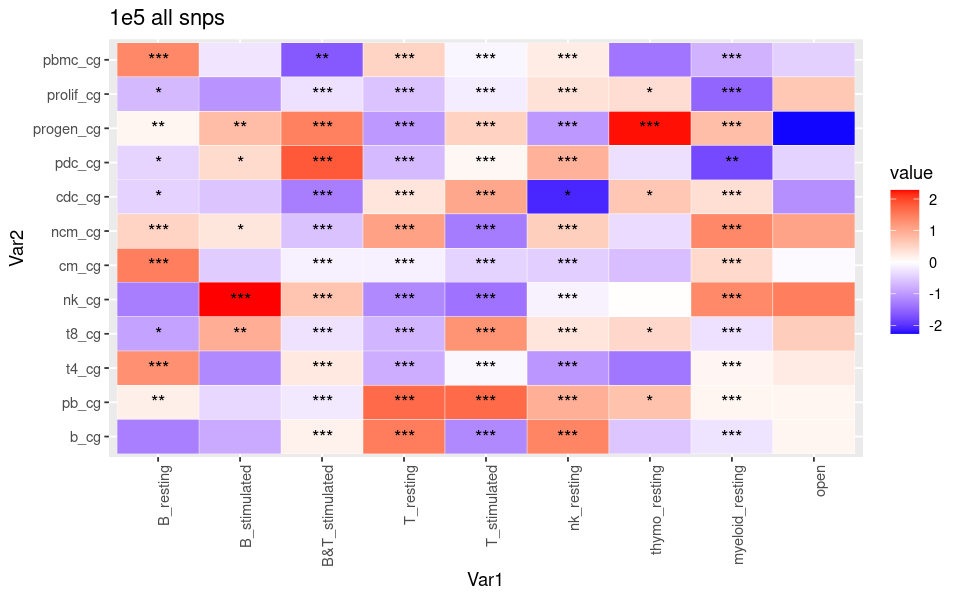

In [23]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 all snps")
print(plt)

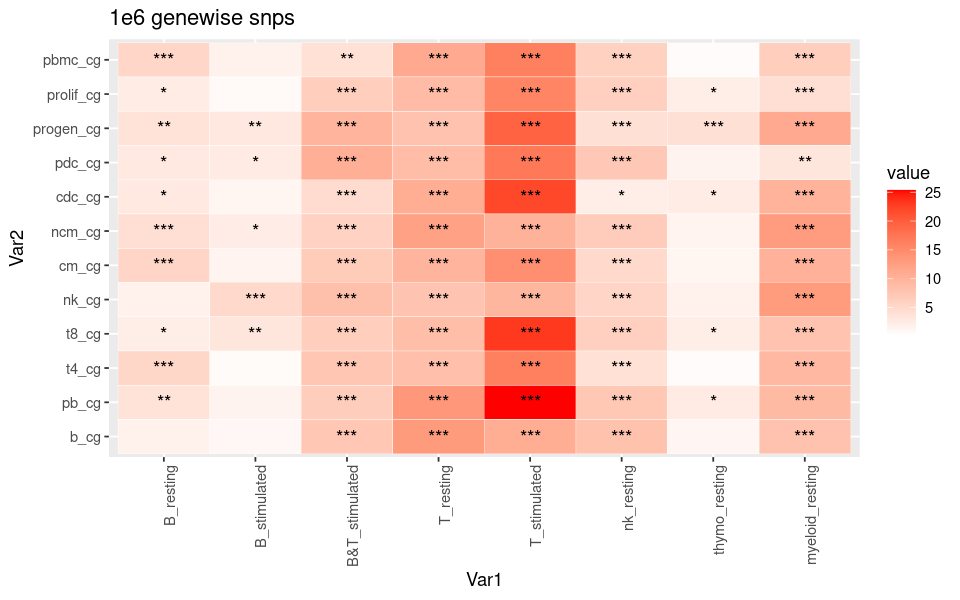

In [12]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e6 genewise snps")
print(plt)

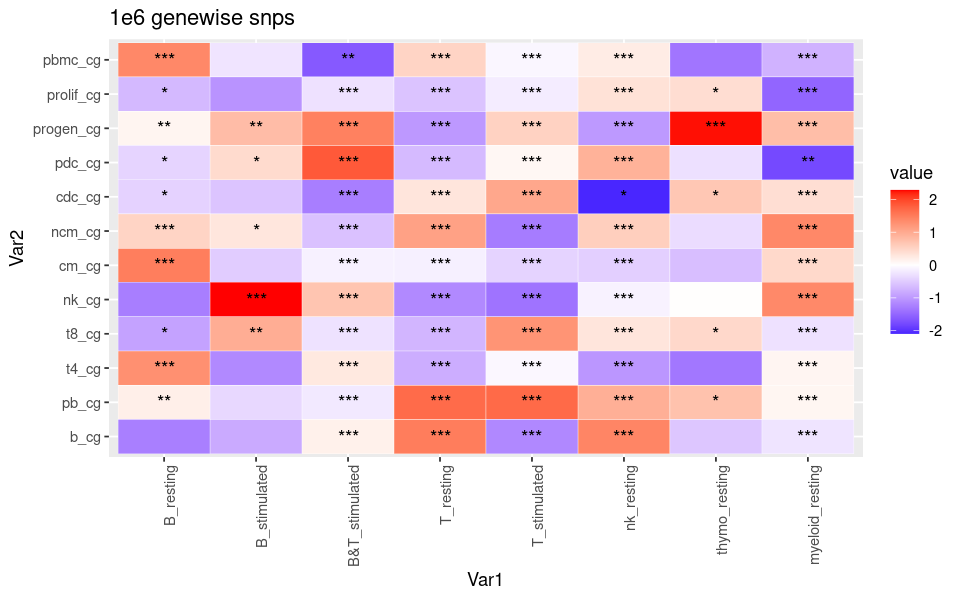

In [9]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e6 genewise snps")
print(plt)

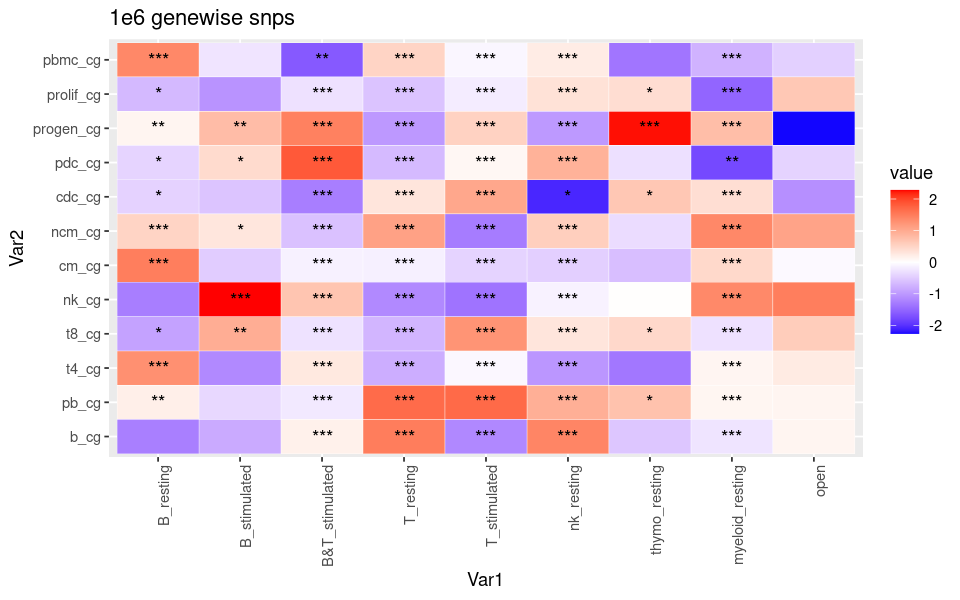

In [6]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e6 genewise snps")
print(plt)

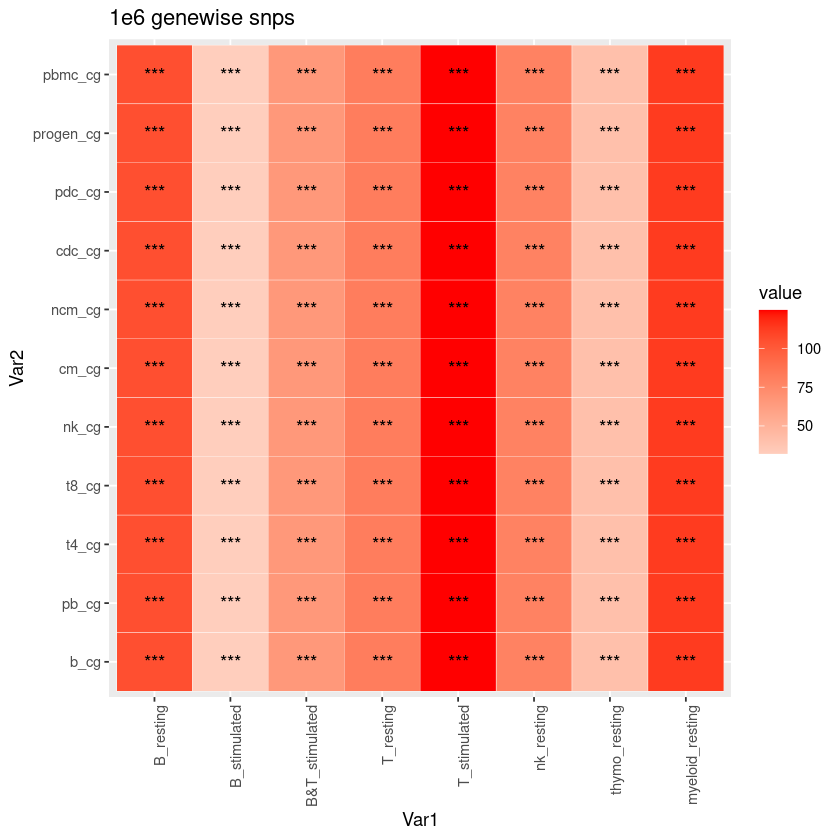

In [60]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e6 genewise snps")
print(plt)

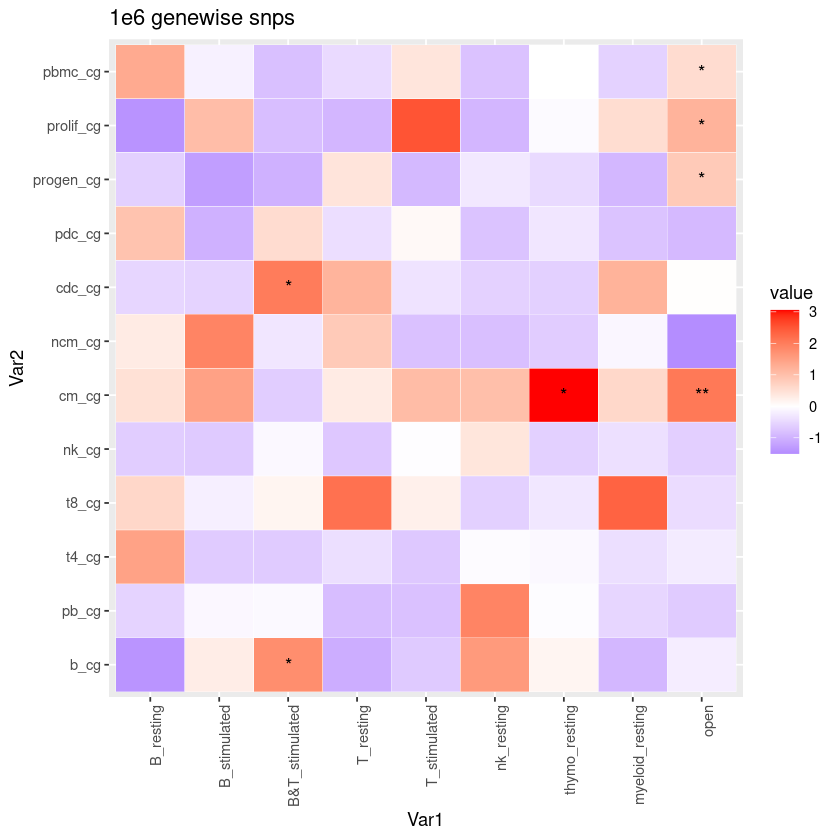

In [25]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e6 genewise snps")
print(plt)

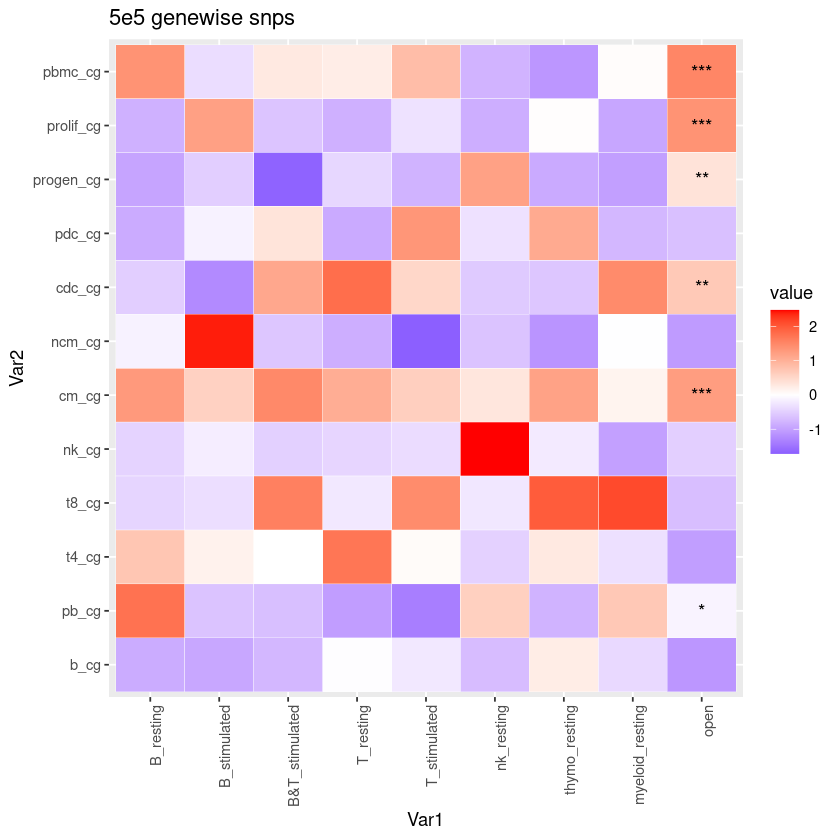

In [23]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("5e5 genewise snps")
print(plt)

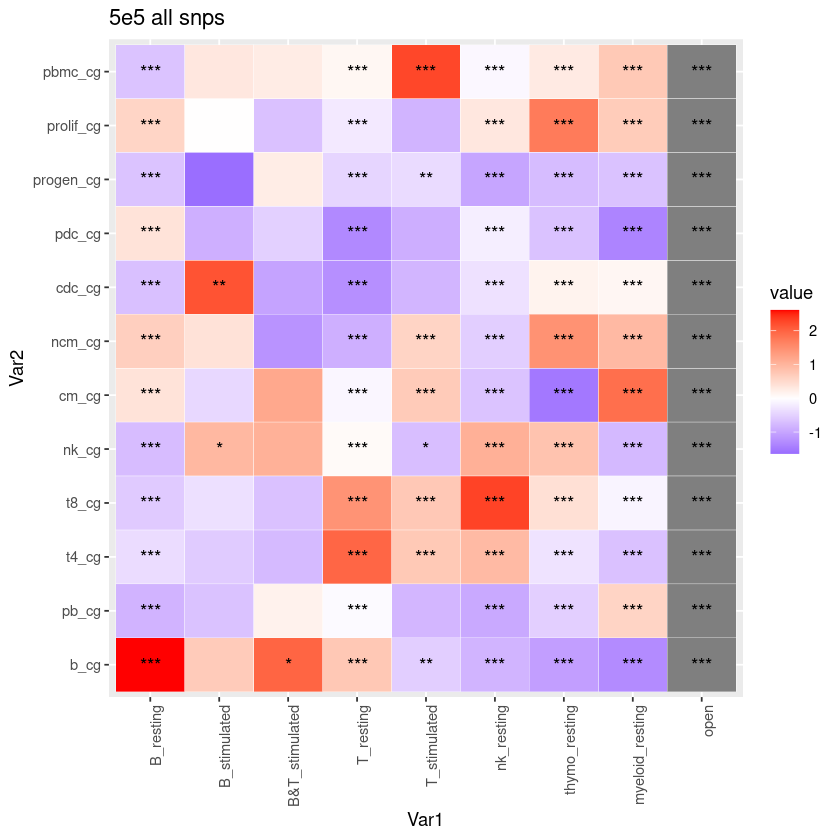

In [21]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("5e5 all snps")
print(plt)

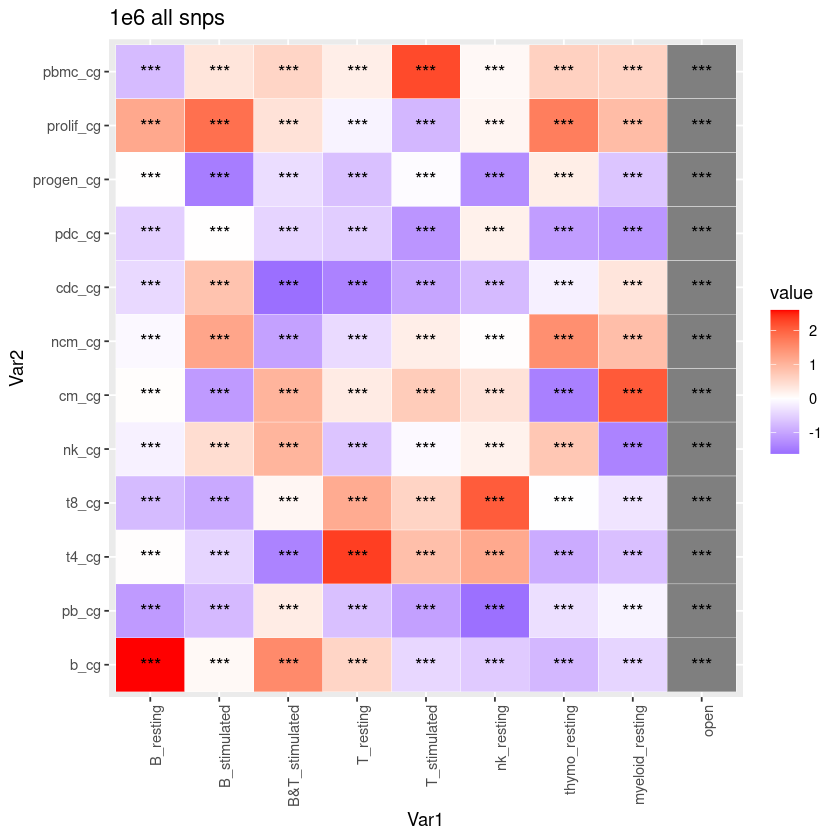

In [19]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e6 all snps")
print(plt)

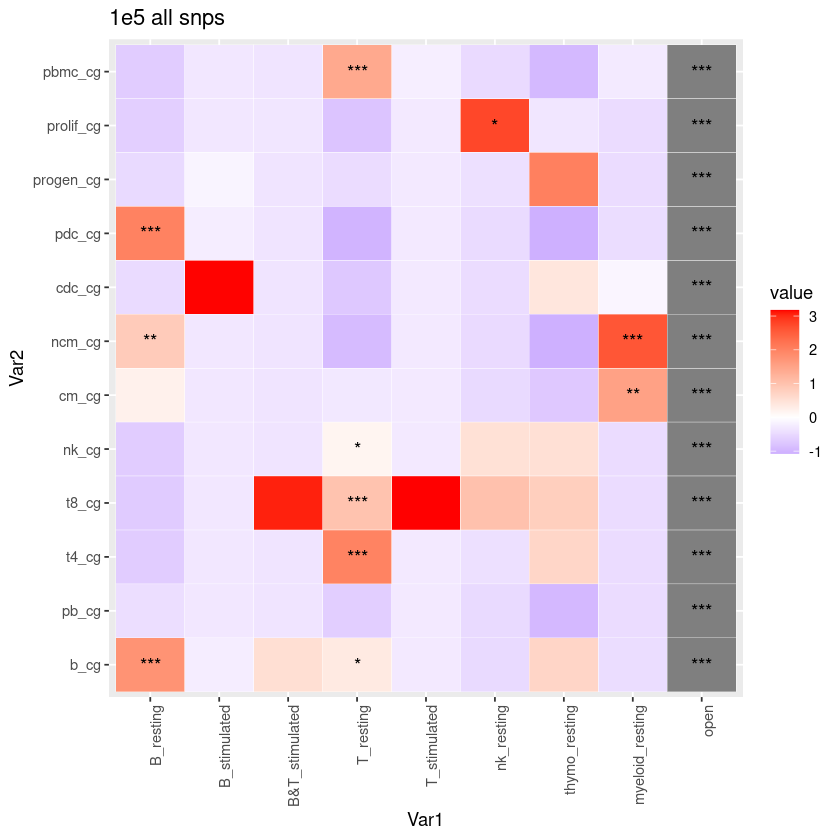

In [17]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 all snps")
print(plt)

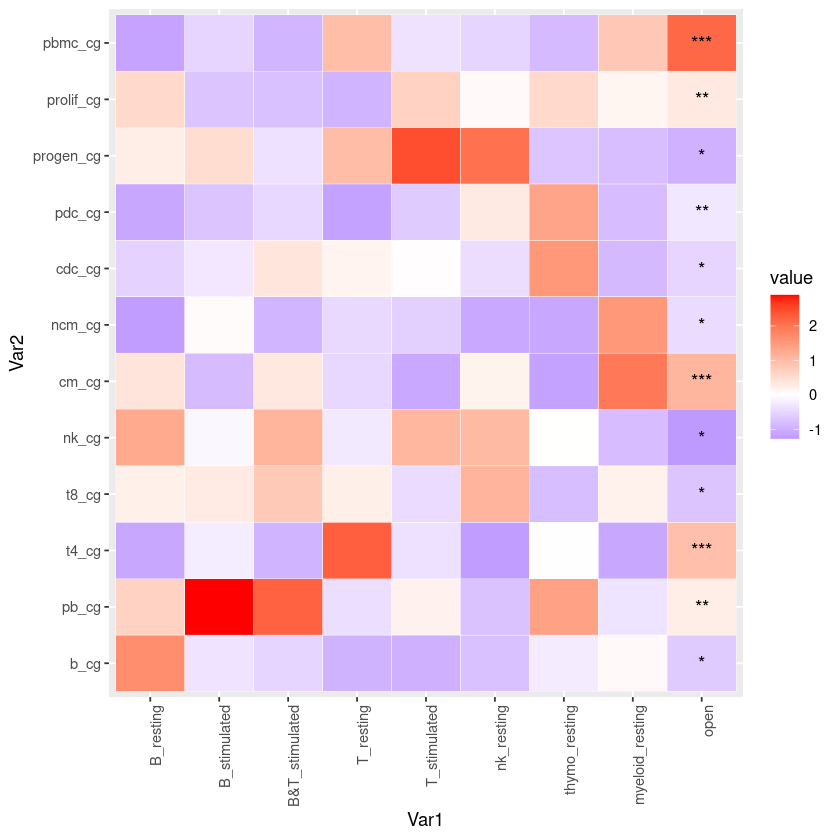

In [12]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))
print(plt)

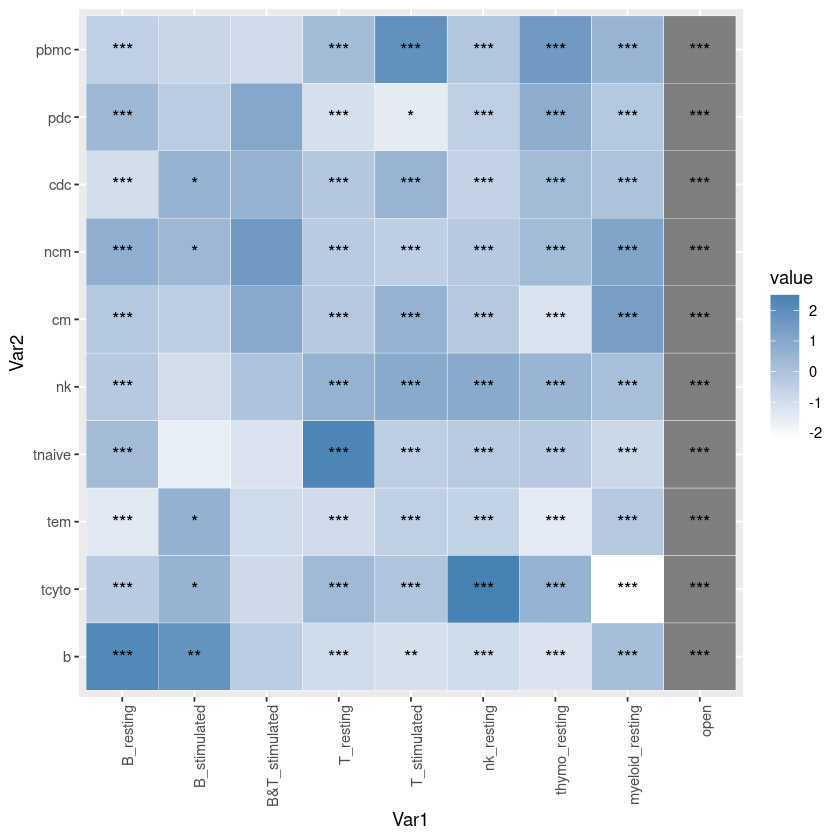

In [18]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient(low = "white", high = "steel blue") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))
print(plt)

In [5]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient(low = "white", high = "steelblue") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)
print(plt)

ERROR: Error in ggplot(df.use, aes(Var1, Var2)): object 'df.use' not found


In [6]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient(low = "white", high = "steelblue") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)
print(plt)

ERROR: Error in ggplot(df.use, aes(Var1, Var2)): object 'df.use' not found


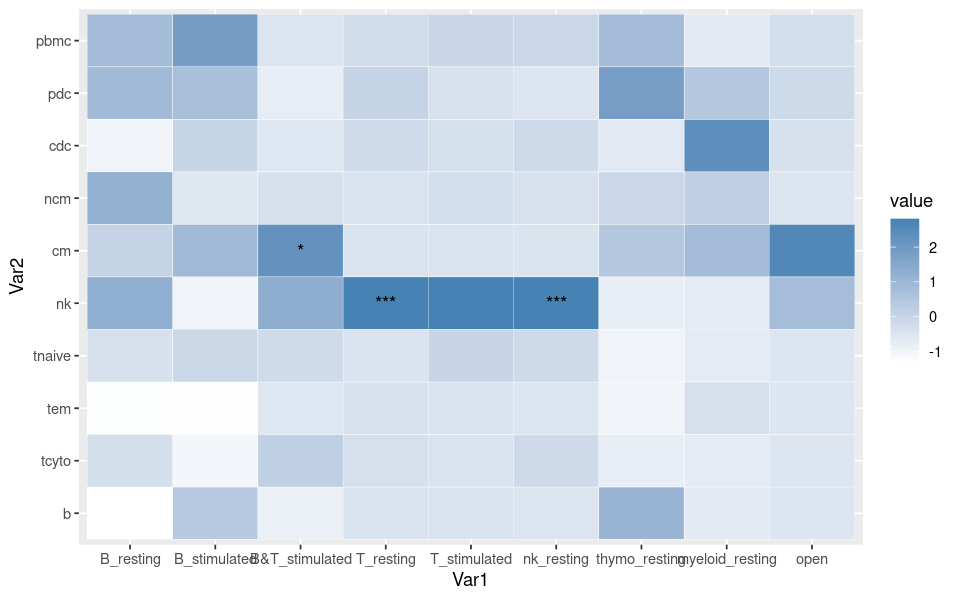

In [19]:

plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient(low = "white", high = "steelblue") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)
print(plt)

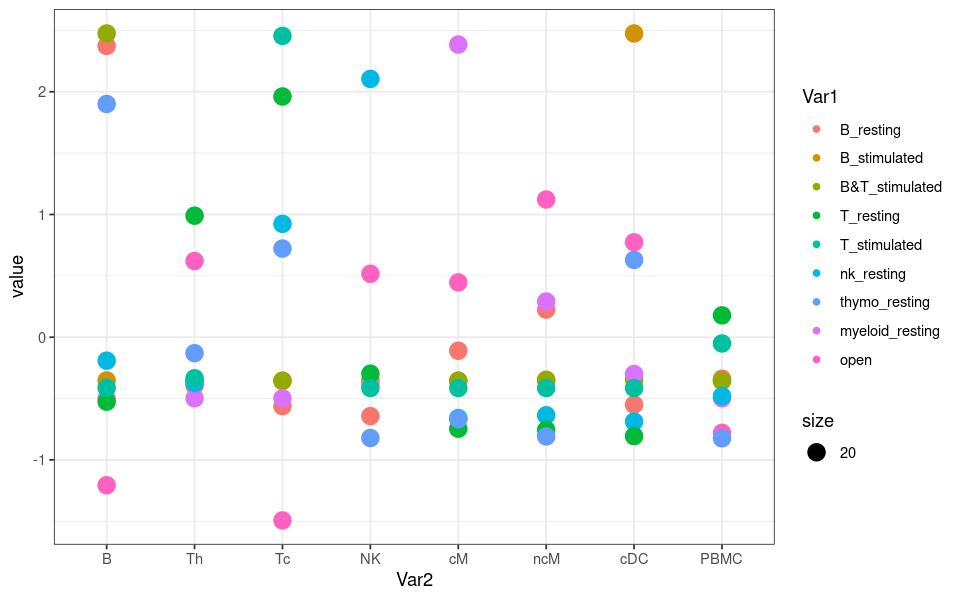

In [4]:

ggplot(df.use,aes(x=Var2, y=value, color=Var1, size=20)) + geom_point() + theme_bw()

In [ ]:
###### NORMALIZE BY OPEN EXPRESION

In [34]:
##ORIGINAL VISUALIZATION
#dir='/ye/yelabstore3/10x.lupus/eqtls/sle.10pcs.subtracted/all/'
dir='/wynton/group/ye/ggordon/lupus/analyses/atac_enrichemnt/'
out='atac.enrichment.pdf'

#cts=c('Th', 'Tc', 'B', 'cM', 'ncM', 'NK', 'MK', 'cDC', 'PBMC')
#cts=c('pbmc', 'b', 'cdc', 'cm', 'ncm', 'nk', 'pdc', 'progen', 'prolif', 'tcyto', 'tem', 'tnaive', 'treg')
cts=c('pbmc', 'b', 'cdc', 'cm', 'ncm', 'nk', 'pdc', 'tcyto', 'tem', 'tnaive')
#cts=c('pbmc', 'b', 'cm', 'ncm', 'nk', 'pdc', 'tcyto', 'tem', 'tnaive')
cts=c('pbmc_cg', 'b_cg', 'cdc_cg', 'cm_cg', 'ncm_cg', 'nk_cg', 'pb_cg', 'pdc_cg', 'progen_cg', 'prolif_cg', 't4_cg', 't8_cg')
#t8_cg.atac.MW.enrichment.genewise.1e5.txt 

all.df=NULL
for(c in cts){
    #res=fread(file=paste(dir, c, '.atac.MW.enrichment.txt', sep=''))
    #res=fread(file=paste(dir, 'filtered.', c, '.atac.MW.enrichment.txt', sep=''))
    #res=fread(file=paste(dir, c, '.atac.MW.enrichment.txt', sep=''))
    #res=fread(file=paste(dir, c, '.atac.MW.enrichment.genewise.1e6.txt', sep=''))
    res=fread(file=paste(dir, c, '.atac.MW.enrichment.1e5.txt', sep=''))
    all.df=rbind(all.df, data.frame(res, ct=c))
    
}



#all.df$pval_sig='.'
#all.df$pval_sig[all.df$pval < 0.00001]='*'
#all.df$pval_sig[all.df$pval < 0.0000001]='**'
#all.df$pval_sig[all.df$pval < 0.0000000001]='***'

all.df$pval_sig='.'
all.df$pval_sig[all.df$pval < 0.01]='*'
all.df$pval_sig[all.df$pval < 0.001]='**'
all.df$pval_sig[all.df$pval < 0.0001]='***'


all.df.use=all.df[all.df$ct!='MK', ]
all.df.use$pair=paste(all.df.use$group, all.df.use$ct)
print(head(all.df.use))

all.df.use$logp=-log10(all.df.use$pval)

#mat=dcast(all.df.use, group ~ ct, value.var = 'OR')

mat=dcast(all.df.use, group ~ ct, value.var = 'logp')
rownames(mat)=mat$group

# #normalize by row
mat=mat[, -1]
col_names=colnames(mat)
print(mat)
#mat <- t(apply(mat, 1, function(x){scale(x)}))
mat <- t(apply(mat, 1, function(x){(x)}))
mat=t(apply(mat, 1, "/", mat['open',]))
mat_nrm=mat[-which(rownames(mat) %in% "open"), ]
print(mat)
colnames(mat_nrm)=col_names
df.use=melt(mat_nrm)
print(df.use)
df.use$pair=paste(df.use$Var1, df.use$Var2)
df.use$pval_sig=all.df.use$pval_sig[match(df.use$pair, all.df.use$pair)]

print('normalized')
print(head(df.use))

# print(unique(df.use$Var1))
# print(unique(df.use$Var2))

# #  [1] B_resting          B_stimulated       B&T_stimulated     EPI_resting       
# #  [5] myeloid_resting    nk_resting         open               progenitor_resting
# #  [9] T_resting          T_stimulated       thymo_resting    

order_var1=c('B_resting', 'B_stimulated', 'B&T_stimulated', 'T_resting', 'T_stimulated',  'nk_resting', 'EPI_resting', 'progenitor_resting', 'thymo_resting', 'myeloid_resting')
#order_var1=c('B_resting', 'B_stimulated', 'B&T_stimulated', 'T_resting', 'T_stimulated',  'nk_resting', 'EPI_resting', 'progenitor_resting', 'thymo_resting', 'myeloid_resting', 'open')
#order_var2=c('B', 'Th', 'Tc', 'NK', 'cM', 'ncM', 'cDC', 'PBMC', 'ct.combined')
#order_var2=c('b', 'tcyto', 'tem', 'tnaive', 'nk', 'cm', 'ncm', 'cdc', 'pdc','progen','prolif','pbmc', 'ct.combined')

#order_var2=c('b_cg', 'tcyto', 'tem', 'tnaive', 'nk', 'cm', 'ncm', 'cdc', 'pdc','progen','prolif','pbmc', 'ct.combined')
order_var2=c( 'b_cg','pb_cg', 't4_cg', 't8_cg', 'nk_cg','cm_cg', 'ncm_cg','cdc_cg',  'pdc_cg', 'progen_cg', 'prolif_cg','pbmc_cg', 'ct.combined')

#order_var2=c('b', 'tcyto', 'tem', 'tnaive', 'nk', 'cm', 'ncm', 'pdc','pbmc', 'ct.combined')
df.use$Var1=factor(df.use$Var1, levels=order_var1)
df.use$Var2=factor(df.use$Var2, levels=order_var2)


df.use=df.use[-which(df.use$Var1 %in% c('EPI_resting', 'progenitor_resting')), ]

            W      pval           group      ct pval_sig
1  7133749325 0.9706005       B_resting pbmc_cg        .
2  2001103269 1.0000000    B_stimulated pbmc_cg        .
3  4250065938 1.0000000  B&T_stimulated pbmc_cg        .
4 12411730056 1.0000000     EPI_resting pbmc_cg        .
5  7770680315 0.4929589 myeloid_resting pbmc_cg        .
6  5317801778 0.9911502      nk_resting pbmc_cg        .
                     pair
1       B_resting pbmc_cg
2    B_stimulated pbmc_cg
3  B&T_stimulated pbmc_cg
4     EPI_resting pbmc_cg
5 myeloid_resting pbmc_cg
6      nk_resting pbmc_cg
                        pbmc_cg         b_cg       cdc_cg        cm_cg
B_resting          1.295948e-02 4.921205e+00 4.281014e-01 1.850272e+00
B_stimulated       1.336630e-11 3.406940e-04 1.587570e-02 1.271169e-06
B&T_stimulated     0.000000e+00 8.680532e-08 0.000000e+00 1.095717e-12
EPI_resting        0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
myeloid_resting    3.071893e-01 2.139458e-02 5.603346e-01 3.2963

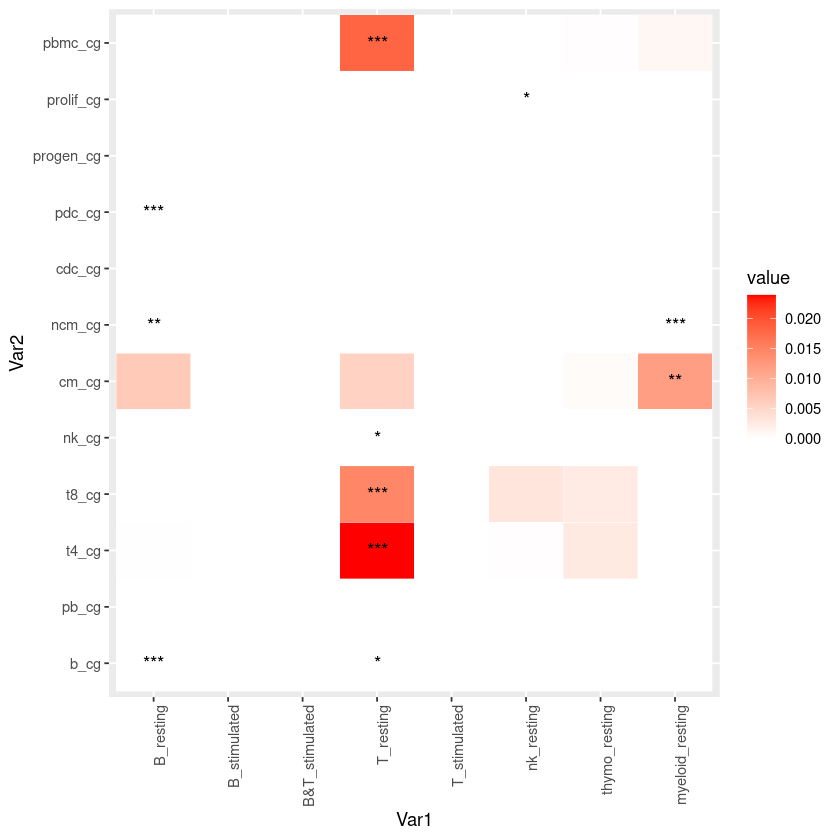

In [35]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))
print(plt)

In [33]:
mat

,pbmc_cg,b_cg,cdc_cg,cm_cg,ncm_cg,nk_cg,pb_cg,pdc_cg,progen_cg,prolif_cg,t4_cg,t8_cg
B_resting,1.929599e+01,50.83820284,19.03055764,2.945866e+01,3.199786e+01,1.860334e+01,1.760183e+01,2.938512e+01,19.318393793,3.124932e+01,2.203887e+01,2.011398e+01
B_stimulated,1.641676e+00,1.93872117,3.07843441,1.051826e+00,1.697155e+00,2.139203e+00,8.566034e-01,6.930888e-01,0.112793132,1.397815e+00,9.431283e-01,1.124879e+00
B&T_stimulated,1.059245e+00,2.16620303,0.23007204,1.647838e+00,1.156151e-01,1.573560e+00,1.010521e+00,5.561694e-01,1.054653470,4.505412e-01,4.012270e-01,4.533728e-01
EPI_resting,6.174522e-08,0.01749436,0.02728221,1.468764e-07,6.080055e-05,1.831274e-07,1.695872e-06,7.207966e-04,0.000338093,1.037461e-05,6.340701e-04,2.732165e-04
myeloid_resting,4.333001e+01,20.69864569,36.44276404,5.584649e+01,4.555959e+01,2.652711e+01,4.158487e+01,1.989857e+01,27.653197267,4.283505e+01,2.748022e+01,3.381900e+01
nk_resting,1.732279e+01,13.64675592,16.12900724,1.447546e+01,1.508268e+01,2.292436e+01,1.306375e+01,1.682313e+01,12.836440609,1.929134e+01,2.223384e+01,2.886868e+01
open,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf
progenitor_resting,0.000000e+00,0.00000000,0.00000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000000,0.000000e+00,0.000000e+00,0.000000e+00
T_resting,5.565577e+01,65.93626863,33.58967987,5.214645e+01,3.945212e+01,5.484416e+01,5.285178e+01,3.248351e+01,46.264992677,4.997005e+01,8.544802e+01,7.697205e+01
T_stimulated,1.610882e+01,3.03105209,1.74207634,8.873920e+00,8.272433e+00,2.236399e+00,1.818239e+00,1.362748e+00,3.719184654,1.694440e+00,8.988548e+00,9.033005e+00


In [ ]:
mat <- t(apply(mat, 1, function(x){(x)}))

In [8]:
mat_norm=t(apply(mat, 1, "/", mat['open',]))



In [9]:
mat_norm

,pbmc_cg,b_cg,cdc_cg,cm_cg,ncm_cg,nk_cg,pb_cg,pdc_cg,progen_cg,prolif_cg,t4_cg,t8_cg
B_resting,0.38055191,0.005667348,0.15979686,0.16224000,1.5620227,0.2088508,0.23923149,0.8197527,0.101359754,0.001722079,0.59748896,0.48389106
B_stimulated,0.14474321,0.299826834,0.12355829,0.21634318,2.6127682,0.1575828,0.31460729,0.1006034,0.008404991,0.234443711,0.12595615,0.24078921
B&T_stimulated,0.07121356,1.428143237,1.34835526,0.07838178,1.5789114,0.6299644,0.66112507,1.3670765,0.000755031,0.048943317,0.17926669,0.70009939
EPI_resting,0.18985551,0.022784225,0.28421204,0.03910838,4.8525984,0.6820588,0.14055380,0.4919534,0.069555589,0.470950946,0.37890166,0.06060872
myeloid_resting,0.09740211,0.009622161,0.70965022,0.24958147,1.4164835,0.2824706,0.22991361,0.1200977,0.006800436,0.303655591,0.21139044,1.43020914
nk_resting,0.03880508,0.520257467,0.08130372,0.17000873,0.2177432,0.3818595,0.79812132,0.1013984,0.093195373,0.013964206,0.20379314,0.10573404
open,1.00000000,1.000000000,1.00000000,1.00000000,1.0000000,1.0000000,1.00000000,1.0000000,1.000000000,1.000000000,1.00000000,1.00000000
progenitor_resting,0.13596618,0.362118537,0.39291891,0.16687846,1.3746522,0.0756568,0.28596213,0.5485673,0.212822886,0.010729607,0.65441316,0.40264883
T_resting,0.14220049,0.067502870,0.53095322,0.16807605,2.3146073,0.1976231,0.15918416,0.3737726,0.258802012,0.051453196,0.22848451,0.97427611
T_stimulated,0.22569898,0.073509044,0.13077222,0.20381999,0.2026401,0.3034998,0.06432495,0.4370386,0.011937491,0.443750974,0.06877003,0.33524814


In [16]:
mat_norm[-which(rownames(mat_norm) %in% "open"), ]
#mat_norm['open',]

,pbmc_cg,b_cg,cdc_cg,cm_cg,ncm_cg,nk_cg,pb_cg,pdc_cg,progen_cg,prolif_cg,t4_cg,t8_cg
B_resting,0.38055191,0.005667348,0.15979686,0.16224000,1.5620227,0.2088508,0.23923149,0.8197527,0.101359754,0.001722079,0.59748896,0.48389106
B_stimulated,0.14474321,0.299826834,0.12355829,0.21634318,2.6127682,0.1575828,0.31460729,0.1006034,0.008404991,0.234443711,0.12595615,0.24078921
B&T_stimulated,0.07121356,1.428143237,1.34835526,0.07838178,1.5789114,0.6299644,0.66112507,1.3670765,0.000755031,0.048943317,0.17926669,0.70009939
EPI_resting,0.18985551,0.022784225,0.28421204,0.03910838,4.8525984,0.6820588,0.14055380,0.4919534,0.069555589,0.470950946,0.37890166,0.06060872
myeloid_resting,0.09740211,0.009622161,0.70965022,0.24958147,1.4164835,0.2824706,0.22991361,0.1200977,0.006800436,0.303655591,0.21139044,1.43020914
nk_resting,0.03880508,0.520257467,0.08130372,0.17000873,0.2177432,0.3818595,0.79812132,0.1013984,0.093195373,0.013964206,0.20379314,0.10573404
progenitor_resting,0.13596618,0.362118537,0.39291891,0.16687846,1.3746522,0.0756568,0.28596213,0.5485673,0.212822886,0.010729607,0.65441316,0.40264883
T_resting,0.14220049,0.067502870,0.53095322,0.16807605,2.3146073,0.1976231,0.15918416,0.3737726,0.258802012,0.051453196,0.22848451,0.97427611
T_stimulated,0.22569898,0.073509044,0.13077222,0.20381999,0.2026401,0.3034998,0.06432495,0.4370386,0.011937491,0.443750974,0.06877003,0.33524814
thymo_resting,0.21148989,0.373237846,0.05700249,0.63711011,0.1963183,0.0898911,0.40754080,0.3061250,0.071375775,0.153944753,0.27862271,0.21535499


ERROR: Error in parse(text = x, srcfile = src): <text>:2:6: unexpected '['
1: g="EIF5A"
2: gene=[
        ^
